# Лабораторная работа по ИАД №2

### Тема: Алгоритмы классификации

Задача классификации в машинном обучении — это тип задачи обучения с учителем , целью которой является разделение объектов на заранее определённые классы или предсказание категориальной метки на основе входных данных.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np 
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=0)

In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

In [ ]:
x = vectorizer.fit_transform(data.data)
y = data.target

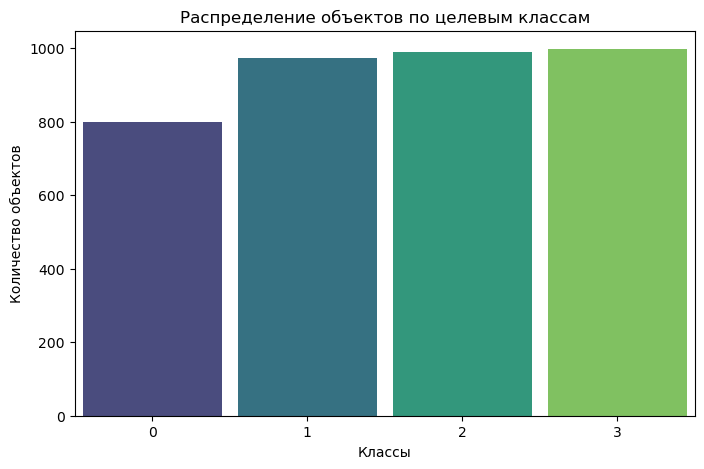

In [9]:
class_distribution = pd.Series(y).value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', width=0.9)
plt.title('Распределение объектов по целевым классам')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

=== Naive Bayes ===
                        precision    recall  f1-score   support

           alt.atheism       0.99      0.90      0.94       240
         comp.graphics       0.93      0.98      0.96       292
               sci.med       0.97      0.95      0.96       297
soc.religion.christian       0.93      0.97      0.95       299

              accuracy                           0.95      1128
             macro avg       0.96      0.95      0.95      1128
          weighted avg       0.95      0.95      0.95      1128



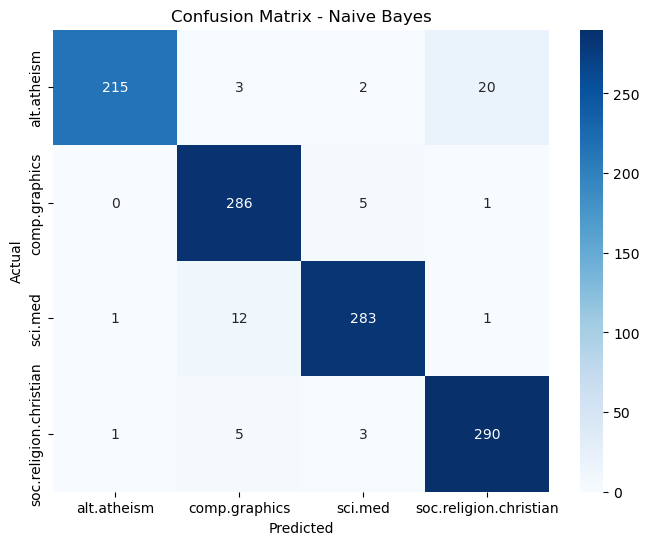

=== Logistic Regression ===
                        precision    recall  f1-score   support

           alt.atheism       0.99      0.91      0.95       240
         comp.graphics       0.95      0.98      0.96       292
               sci.med       0.96      0.98      0.97       297
soc.religion.christian       0.95      0.97      0.96       299

              accuracy                           0.96      1128
             macro avg       0.96      0.96      0.96      1128
          weighted avg       0.96      0.96      0.96      1128



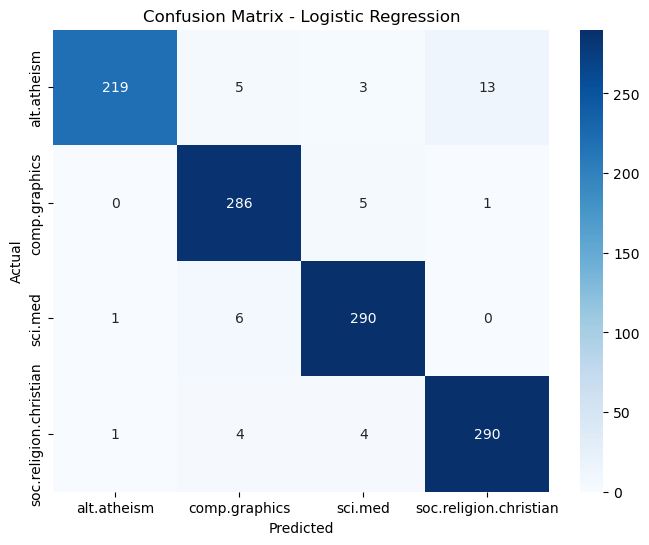

=== Linear SVM ===
                        precision    recall  f1-score   support

           alt.atheism       0.99      0.95      0.97       240
         comp.graphics       0.96      0.98      0.97       292
               sci.med       0.97      0.97      0.97       297
soc.religion.christian       0.96      0.97      0.97       299

              accuracy                           0.97      1128
             macro avg       0.97      0.97      0.97      1128
          weighted avg       0.97      0.97      0.97      1128



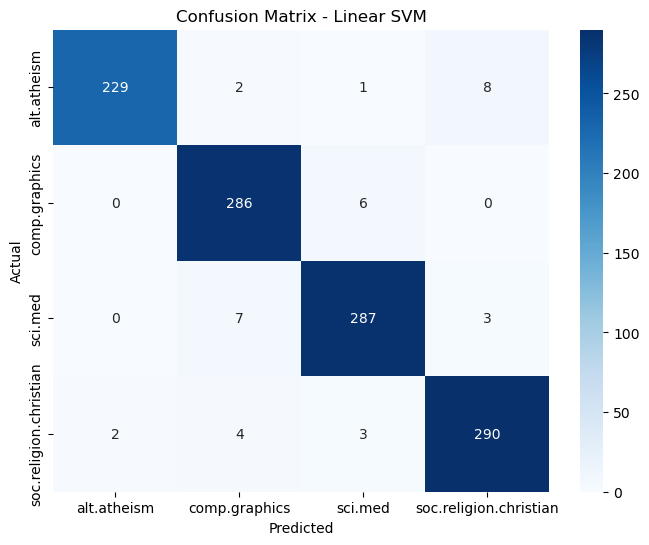

In [ ]:



# 3. Разделение данных <button class="citation-flag" data-index="3"><button class="citation-flag" data-index="5">


# 4. Обучение моделей <button class="citation-flag" data-index="4"><button class="citation-flag" data-index="5"><button class="citation-flag" data-index="8">
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Linear SVM': LinearSVC(class_weight='balanced')
}

# 5. Оценка и визуализация
for name, model in models.items():
    print(f"=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Вывод метрик <button class="citation-flag" data-index="10">
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    
    # Визуализация матрицы ошибок <button class="citation-flag" data-index="7">
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()